# Initiation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

raw = pd.read_csv('power_plant_data.csv')

raw.head()
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
 5   SrNum   9568 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 448.6 KB


In [2]:
raw.head(5)

,AT,V,AP,RH,PE,SrNum
0,8.34,40.77,1010.84,90.01,480.48,1
1,23.64,58.49,1011.40,74.20,445.75,2
2,29.74,56.90,1007.15,41.91,438.76,3
3,19.07,49.69,1007.22,76.79,453.09,4
4,11.80,40.66,1017.13,97.20,464.43,5


In [3]:
X = raw[['AT', 'V', 'AP', 'RH']]
Y = raw['PE']

<AxesSubplot:>

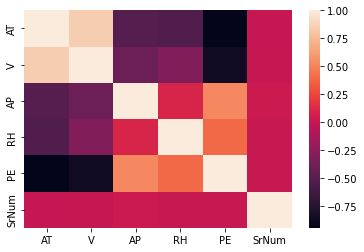

In [4]:
import seaborn as sns
sns.heatmap(raw.corr())

In [5]:
raw.corr()

,AT,V,AP,RH,PE,SrNum
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128,-0.006899
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780,-0.001902
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429,0.022047
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794,0.010369
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000,0.008107
SrNum,-0.006899,-0.001902,0.022047,0.010369,0.008107,1.000000


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

---
# Multiple Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
model_fit = LinearRegression()
model_fit.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred0 = model_fit.predict(X_test)
y_pred0

array([433.36241603, 448.38864548, 445.88661799, ..., 456.06061126,
       446.91190634, 432.57326179])

In [9]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred0)/100)
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred0)/100000)
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred0)/1000))

Mean Absolute Error:  0.03630457657633139
Mean Squared Error:  0.00020218249777037914
Root Mean Squared Error:  0.1421908920326401


In [10]:
print(model_fit.score(X_test, y_test))

0.9298994694436788


---
# Gradient Boosting

In [11]:
from sklearn import datasets, ensemble

params = {'n_estimators': 1750,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01}

gb_reg = ensemble.GradientBoostingRegressor(**params)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=5,
                          n_estimators=1750)

In [12]:
from sklearn.metrics import r2_score

y_true = y_test
y_pred = gb_reg.predict(X_test)

print(f"GB model R2 is {round(r2_score(y_true, y_pred)* 100 , 2)} %")

GB model R2 is 95.31 %


---
# Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(X_train, y_train);

In [14]:
from sklearn.metrics import r2_score

y_true = y_test
y_pred1 = rf.predict(X_test)


print(f"Random forest model R2 is {round(r2_score(y_true, y_pred1)* 100 , 2)} %")

Random forest model R2 is 96.45 %


---
# Lasso Regression

In [15]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, RepeatedKFold
from numpy import mean, std, absolute
model = Lasso(alpha=1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 3.634 (0.090)


In [16]:
model.fit(X_train, y_train)

Lasso()

In [17]:
def mape(true, predicted):        
    inside_sum = np.abs(predicted - true) / true
    return round(100 * np.sum(inside_sum ) / inside_sum.size,2)

from sklearn.metrics import r2_score

y_true = y_test
y_pred2 = model.predict(X_test)


print(f"GB model MAPE is {mape(y_true, y_pred2)} %")
print(f"GB model R2 is {round(r2_score(y_true, y_pred2)* 100 , 2)} %")

GB model MAPE is 0.8 %
GB model R2 is 92.99 %


---
# Ensemble Prediction

`ypred0` -> Multiple Linear Regression (R2 was ~93%)<br>
`ypred`  -> Gradient Boosting (R2 was 95.3%)<br>
`ypred1` -> Random Forest (R2 was 96.45%)<br>
`ypred2` -> Lasso Regression (R2 was ~93%)

### Averaging Ensemble

In [18]:
from sklearn.metrics import mean_squared_error as MSE
#This is Averaging Ensemble

finalpred = (y_pred0+y_pred+y_pred1+y_pred2)/4
print(f"Ensemble model MAPE is {mape(y_true, finalpred)} %")
print(f"Ensemble model R2 is {round(r2_score(y_true, finalpred)* 100 , 2)} %")

Ensemble model MAPE is 0.65 %
Ensemble model R2 is 95.14 %


### Weighted Averaging Ensemble

In [19]:
#This is weighted average ensemble 

finalpred1=(y_pred0*0.05+y_pred*0.1+y_pred1*0.8+y_pred2*0.05)
print(f"Ensemble model MAPE is {mape(y_true, finalpred1)} %")
print(f"Ensemble model R2 is {round(r2_score(y_true, finalpred1)* 100 , 2)} %")

Ensemble model MAPE is 0.53 %
Ensemble model R2 is 96.34 %


---
# Graphs

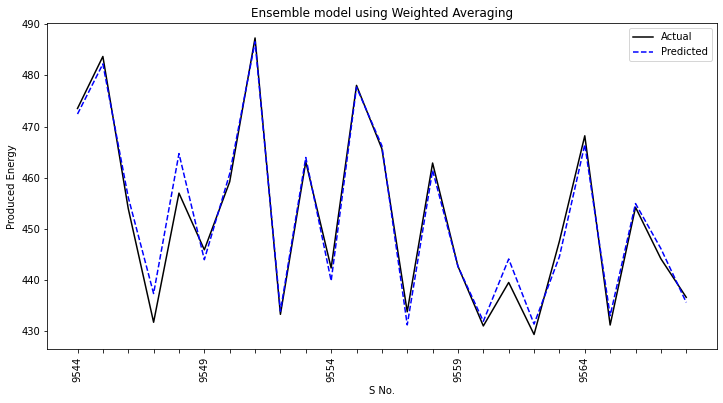

In [24]:
fig, ax = plt.subplots(figsize = (12,6))
index_ordered = raw.SrNum.astype('str').tolist()[-len(X_test):][-25:]
ax.set_xlabel('S No.')
ax.set_ylabel('Produced Energy') 

ax.plot(index_ordered, y_test[-25:], color='k', ls='-', label = 'Actual')

ax.plot(index_ordered, finalpred1[-25:], color='b', ls='--', label = 'Predicted')
every_nth = 5
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(axis='x', labelrotation= 90)
plt.legend()
plt.title('Ensemble model using Weighted Averaging')
plt.draw()

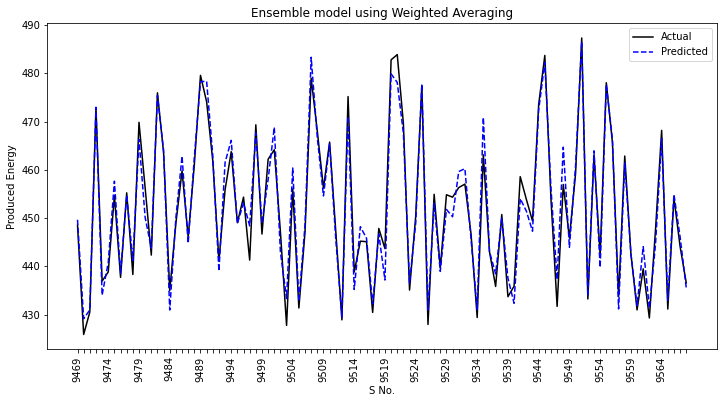

In [25]:
fig, ax = plt.subplots(figsize = (12,6))
index_ordered = raw.SrNum.astype('str').tolist()[-len(X_test):][-100:]
ax.set_xlabel('S No.')
ax.set_ylabel('Produced Energy') 

ax.plot(index_ordered, y_test[-100:], color='k', ls='-', label = 'Actual')

ax.plot(index_ordered, finalpred1[-100:], color='b', ls='--', label = 'Predicted')
every_nth = 5
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(axis='x', labelrotation= 90)
plt.legend()
plt.title('Ensemble model using Weighted Averaging')
plt.draw()

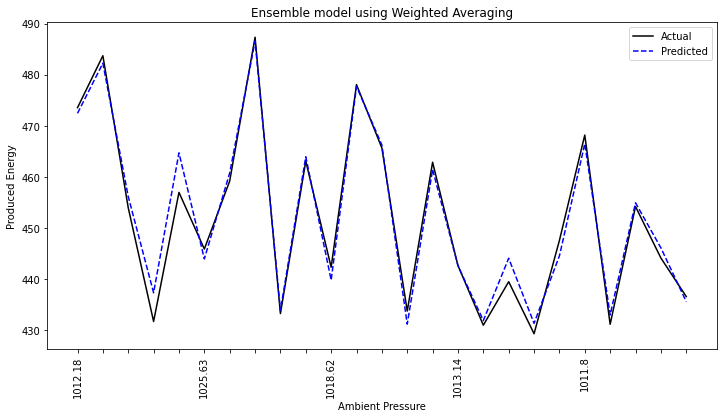

In [26]:
fig, ax = plt.subplots(figsize = (12,6))
index_ordered = raw.AP.astype('str').tolist()[-len(X_test):][-25:]
ax.set_xlabel('Ambient Pressure')
ax.set_ylabel('Produced Energy') 

ax.plot(index_ordered, y_test[-25:], color='k', ls='-', label = 'Actual')

ax.plot(index_ordered, finalpred1[-25:], color='b', ls='--', label = 'Predicted')
every_nth = 5
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(axis='x', labelrotation= 90)
plt.legend()
plt.title('Ensemble model using Weighted Averaging')
plt.draw()

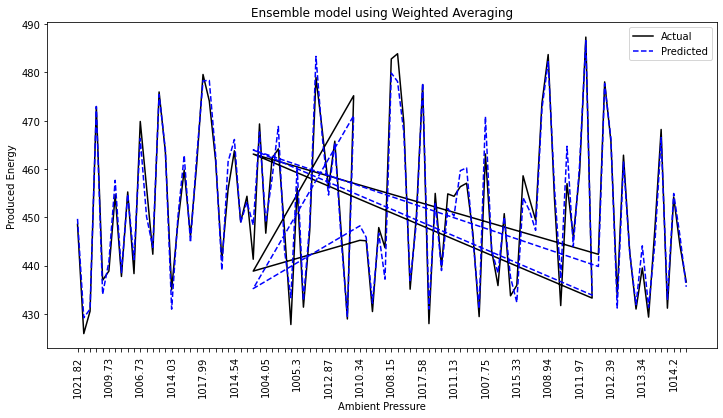

In [27]:
fig, ax = plt.subplots(figsize = (12,6))
index_ordered = raw.AP.astype('str').tolist()[-len(X_test):][-100:]
ax.set_xlabel('Ambient Pressure')
ax.set_ylabel('Produced Energy') 

ax.plot(index_ordered, y_test[-100:], color='k', ls='-', label = 'Actual')

ax.plot(index_ordered, finalpred1[-100:], color='b', ls='--', label = 'Predicted')
every_nth = 5
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(axis='x', labelrotation= 90)
plt.legend()
plt.title('Ensemble model using Weighted Averaging')
plt.draw()